In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = spark.read.csv("/FileStore/tables/Heart_disease_cleveland_new.csv", header=True, sep=',')
df = df.toPandas()

## Renomeando as colunas

In [0]:
df = df.rename(columns={'cp': 'chest_pain_type'}) #tipo de pressão toráxica 
df = df.rename(columns={'trestbps': 'trest_bps'}) #pressão arterial
df = df.rename(columns={'chol': 'chol_level'}) #colesterol
df = df.rename(columns={'fbs': 'blood_sugar'}) #taxa de glicemia
df = df.rename(columns={'restecg': 'rest_ecg'}) #eletrocardiograma em repouso
df = df.rename(columns={'exang': 'exercise_angina'}) #angina induzida pelo exercício física
df = df.rename(columns={'oldpeak': 'old_peak'}) #depressão de ST induzida por exercício em relação ao repouso
df = df.rename(columns={'ca': 'colored_vessels'}) #número de vasos principais coloridos por fluoroscopia (0-3)
# df.rename(columns={'thal': ''}) #Talassemia: 1 = normal; 2 = problema corrigido; 3 = problema reversível
# df.rename(columns={'target': ''}) #1 - tem a doença, 0 - não tem

In [0]:
df.head()

,age,sex,chest_pain_type,trest_bps,chol_level,blood_sugar,rest_ecg,thalach,exercise_angina,old_peak,slope,colored_vessels,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [0]:
df.describe()

,age,sex,chest_pain_type,trest_bps,chol_level,blood_sugar,rest_ecg,thalach,exercise_angina,old_peak,slope,colored_vessels,thal,target
count,303,303,303,303,303,303,303,303,303,303,303,303,303,303
unique,41,2,4,50,152,2,3,91,2,40,3,4,3,2
top,58,1,3,120,204,0,0,162,0,0,0,0,1,0
freq,19,206,144,37,6,258,151,11,204,99,142,180,168,164


In [0]:
print(df.isnull().sum())

age                0
sex                0
chest_pain_type    0
trest_bps          0
chol_level         0
blood_sugar        0
rest_ecg           0
thalach            0
exercise_angina    0
old_peak           0
slope              0
colored_vessels    0
thal               0
target             0
dtype: int64


In [0]:
df.shape

Out[14]: (303, 14)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              303 non-null    object
 1   sex              303 non-null    object
 2   chest_pain_type  303 non-null    object
 3   trest_bps        303 non-null    object
 4   chol_level       303 non-null    object
 5   blood_sugar      303 non-null    object
 6   rest_ecg         303 non-null    object
 7   thalach          303 non-null    object
 8   exercise_angina  303 non-null    object
 9   old_peak         303 non-null    object
 10  slope            303 non-null    object
 11  colored_vessels  303 non-null    object
 12  thal             303 non-null    object
 13  target           303 non-null    object
dtypes: object(14)
memory usage: 33.3+ KB


In [0]:
df['sex_name'] = df['sex'].replace(['0'], 'female')
df['sex_name'] = df['sex_name'].replace(['1'], 'male')
df['sex_name'].head()

Out[5]: 0      male
1      male
2      male
3      male
4    female
Name: sex_name, dtype: object

#Análise relacionada ao sexo com target

Out[14]: male      0.679868
female    0.320132
Name: sex_name, dtype: float64

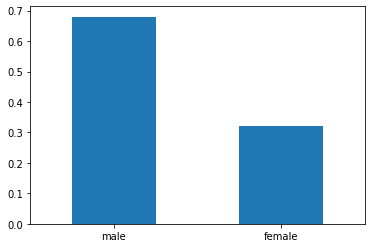

In [0]:
sex_count = df['sex_name'].value_counts(normalize=True).plot(kind='bar', rot=0);
sex_count_table = df['sex_name'].value_counts(normalize=True);
sex_count_table

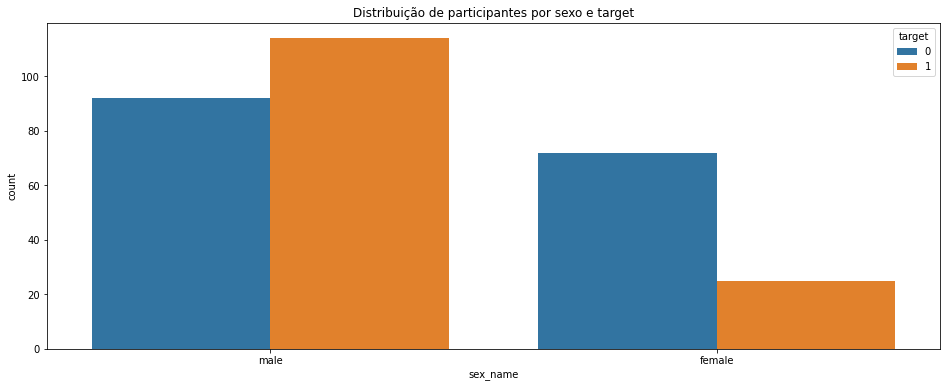

In [0]:
plt.figure(figsize=(16, 6))
plt.title('Distribuição de participantes por sexo e target')
sns.countplot(data=df, x='sex_name', hue='target');


In [0]:
sex_target = pd.crosstab(df['sex_name'], df['target'])

sex_target


target,0,1
sex_name,,
female,72,25
male,92,114


In [0]:
sex_target_percent = pd.crosstab(df['sex_name'], df['target'], normalize='index')
sex_target_percent

target,0,1
sex_name,,
female,0.742268,0.257732
male,0.446602,0.553398


### Considerações acerca do sexo em relação a possuir ou não doenças cardiovasculares
Nota-se que mais homens possuem doenças cardiacas do que mulheres. Sendo que apenas 26% mulheres possuem doenças cardiovasculares contra 55% dos homens que possuem doenças

#Análises relacionadas a idade e possuir ou não doenças

Out[60]: <AxesSubplot:title={'center':'Distribuição de participantes por idade'}, xlabel='age', ylabel='Count'>

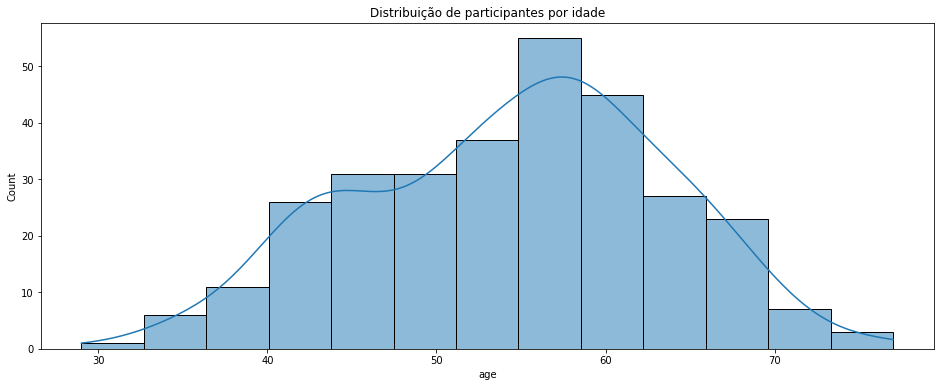

In [0]:
plt.figure(figsize=(16, 6))
plt.title('Distribuição de participantes por idade')
sns.histplot(data=df, x=df['age'].astype(int),kde = True)


## Distribuição de doenças cardiovasculares por idade

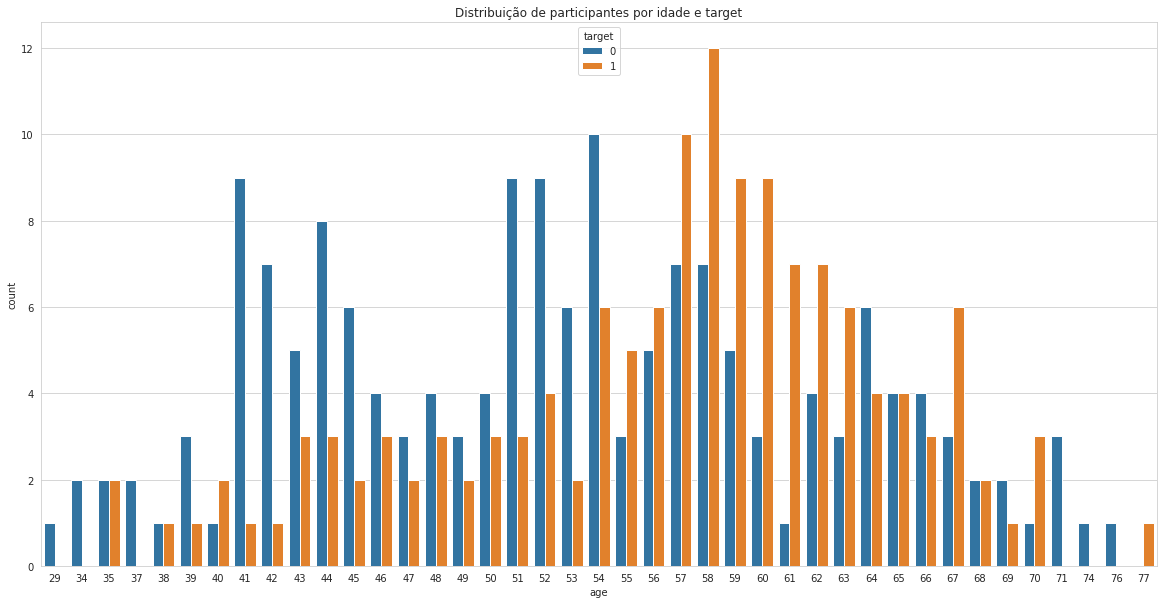

In [0]:
plt.figure(figsize=(20, 10))
plt.title('Distribuição de participantes por idade e target')
sns.countplot(data=df, x=df['age'].astype(int), hue='target');


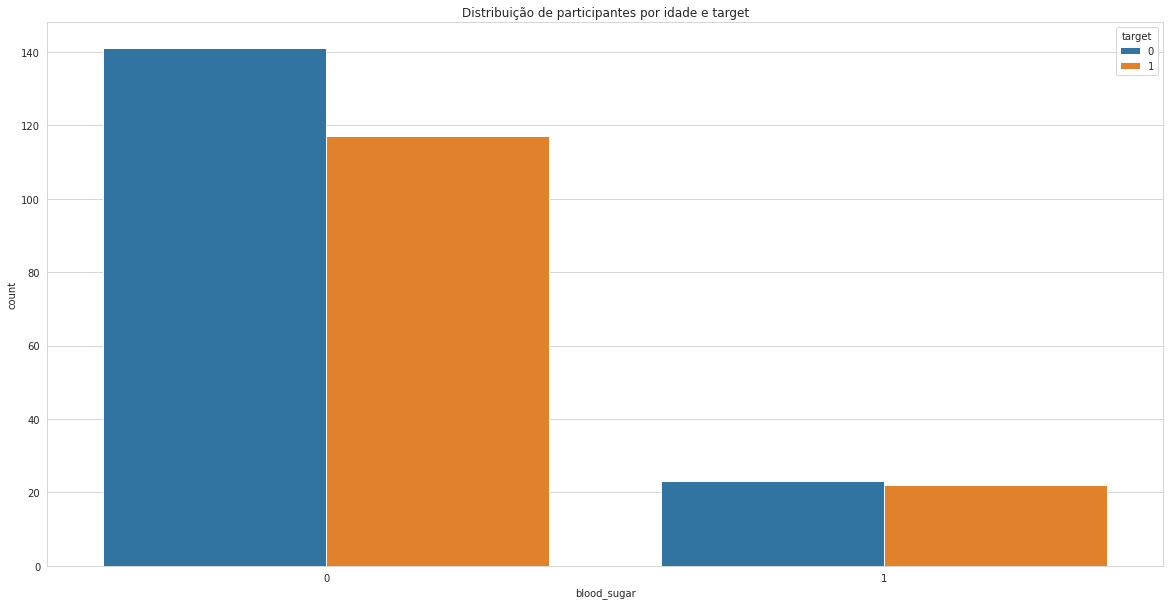

In [0]:
plt.figure(figsize=(20, 10))
plt.title('Distribuição de participantes por glicemia e target')
sns.countplot(data=df, x=df['blood_sugar'].astype(int), hue='target');

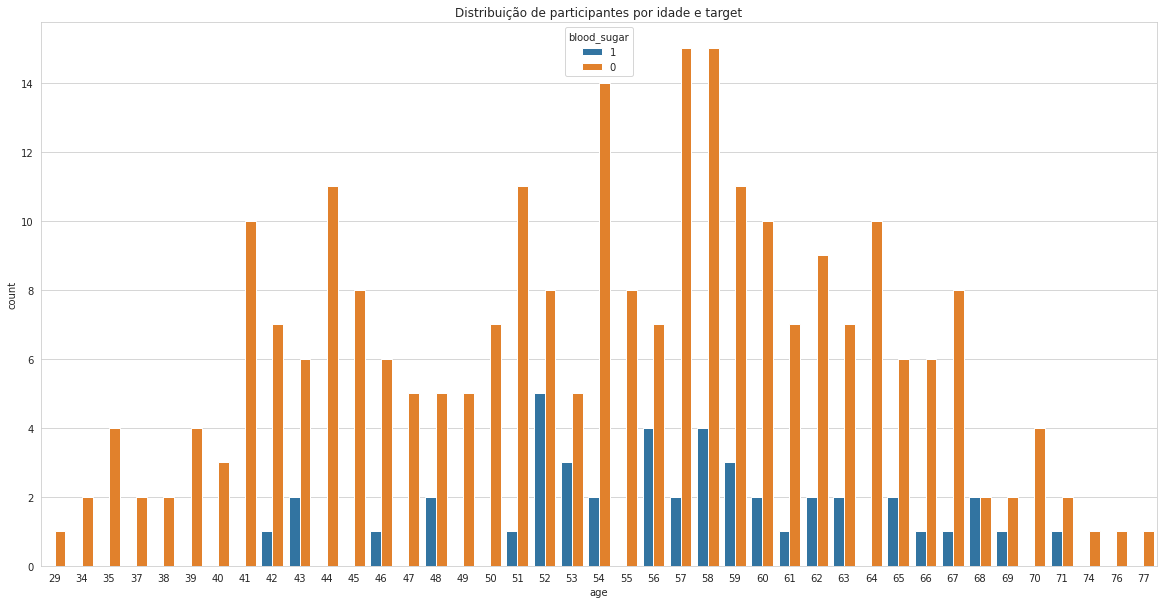

In [0]:
plt.figure(figsize=(20, 10))
plt.title('Distribuição de participantes por idade e glicemia')
sns.countplot(data=df, x=df['age'].astype(int), hue='blood_sugar');

In [0]:
df.head()

,age,sex,chest_pain_type,trest_bps,chol_level,blood_sugar,rest_ecg,thalach,exercise_angina,old_peak,slope,colored_vessels,thal,target,sex_name
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0,male
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1,male
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1,male
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0,male
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0,female


In [0]:
df['chol_level'] = df['chol_level'].astype(int)
df.loc[df.chol_level >= 240, 'chol_class'] = 'high'
df.loc[(df.chol_level < 240) & (df.chol_level > 200),  'chol_class'] = 'medium'
df.loc[df.chol_level <= 200, 'chol_class'] = 'normal'

In [0]:
df.head(100)

,age,sex,chest_pain_type,trest_bps,chol_level,blood_sugar,rest_ecg,thalach,exercise_angina,old_peak,slope,colored_vessels,thal,target,chol_class
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0,medium
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1,high
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1,medium
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0,high
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,52,1,3,128,255,0,0,161,1,0,0,1,3,1,high
96,59,1,3,110,239,0,2,142,1,1.2,1,1,3,1,medium
97,60,0,3,150,258,0,2,157,0,2.6,1,2,3,1,high
98,52,1,1,134,201,0,0,158,0,0.8,0,1,1,0,medium


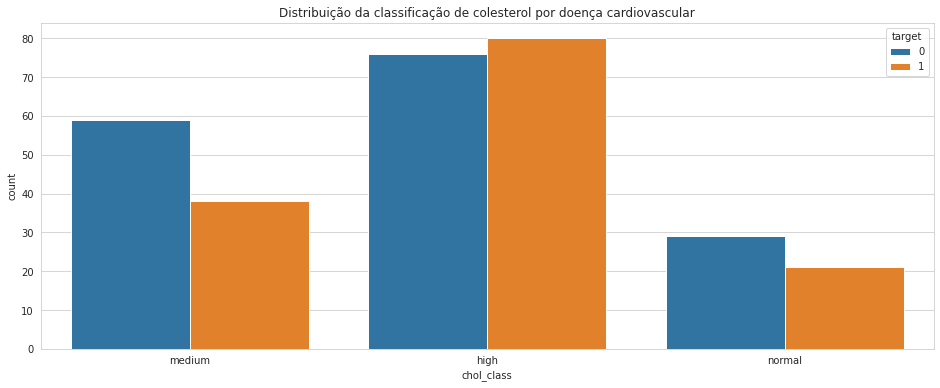

In [0]:
plt.figure(figsize=(16, 6))
plt.title('Distribuição da classificação de colesterol por doença cardiovascular')
sns.countplot(data=df, x=df['chol_class'], hue='target');

Out[50]: <AxesSubplot:>

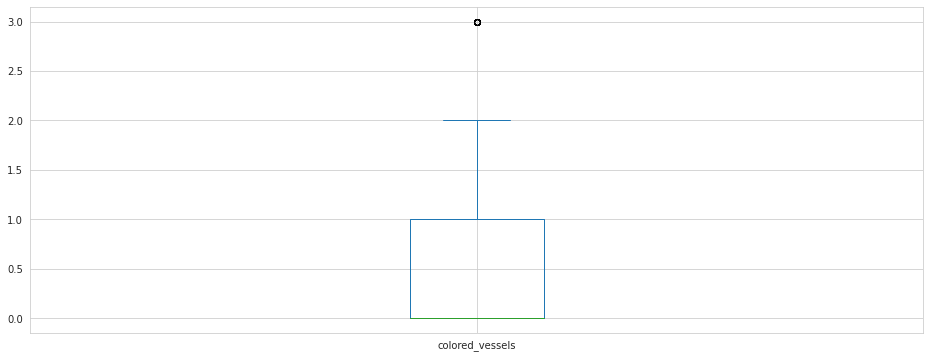

In [0]:
plt.figure(figsize=(16, 6))
df['colored_vessels'].astype(int).plot(kind='box')
#sns.boxplot(df['colored_vessels']);

Out[51]: <AxesSubplot:>

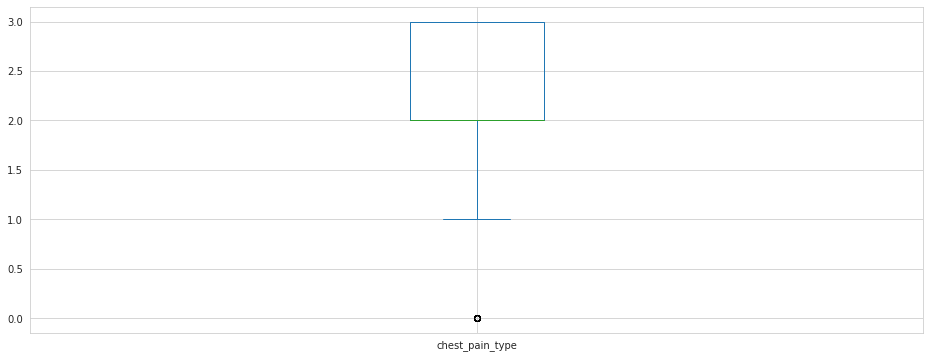

In [0]:
plt.figure(figsize=(16, 6))
df['chest_pain_type'].astype(int).plot(kind='box')
#sns.boxplot(df['colored_vessels']);

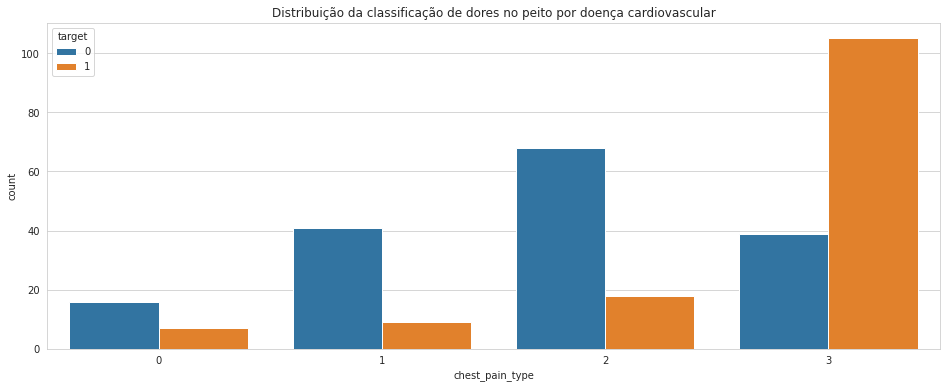

In [0]:
plt.figure(figsize=(16, 6))
plt.title('Distribuição da classificação de dores no peito por doença cardiovascular')
sns.countplot(data=df,  x=df['chest_pain_type'].astype(int), hue='target');

In [0]:
pain_target_percent = pd.crosstab(df['chest_pain_type'], df['target'], normalize=True)
pain_target_percent

target,0,1
chest_pain_type,,
0,0.052805,0.023102
1,0.135314,0.029703
2,0.224422,0.059406
3,0.128713,0.346535


0 = angina típica
 1 = angina atípica
 2 = dor não anginosa
 3 = assintomático
 
 A maior parte de pessoas com doenças cardiovasculares são assintomáticas com relação a dores no peito